[View in Colaboratory](https://colab.research.google.com/github/youkaichao/decision_boundary_for_neural_networks/blob/master/decision_boundary_for_neural_networks.ipynb)

In [0]:
!pip install easydl

In [0]:
# it will print some error message, don't worry
from easydl import *

# create data points

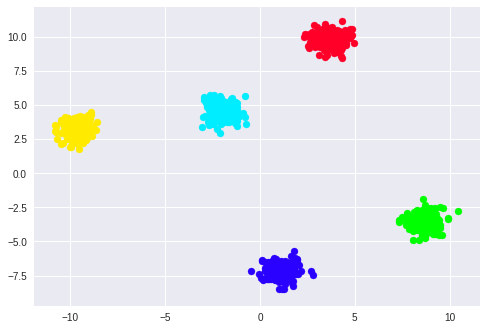

In [9]:
cm = plt.get_cmap('gist_rainbow')
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

########## here to change number of clusters
n_clusters = 5

X, Y = make_blobs(n_samples=1000,n_features=2,centers=n_clusters, cluster_std=0.5)
x_min = X[:, 0].min()
x_max = X[:, 0].max()
x_length = x_max - x_min
x_min -= 0.05 * x_length
x_max += 0.05 * x_length
y_min = X[:, 1].min()
y_max = X[:, 1].max()
y_length = y_max - y_min
y_min -= 0.05 * y_length
y_max += 0.05 * y_length

all = [(x, y) for (x, y) in zip(X, Y)]
clusters = [[(x, y) for (x, y) in zip(X, Y) if y == i] for i in range(n_clusters)]

#here shows the data
for i in range(n_clusters):
    plt.scatter([x[0][0] for x in clusters[i]], [x[0][1] for x in clusters[i]], c=cm(i * 1.0 / n_clusters))
    
plt.show()

# train a classifier and draw decision boundary

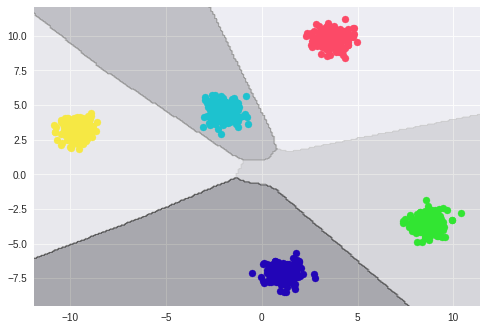

In [13]:
for i in range(n_clusters):
    plt.scatter([x[0][0] for x in clusters[i]], [x[0][1] for x in clusters[i]], c=cm(i * 1.0 / n_clusters))

######### here to change neural network settings to explore the effect of some arguments on decision boundary
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, n_clusters))
mlp.fit(X, Y)

plot_decision_boundary(mlp.predict, np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.show()